## Background

---

<div class="alert alert-block alert-info">
<b>Stages in Building LLM from scratch</b> 
<p>   

Below are the stages of building LLM from scratch


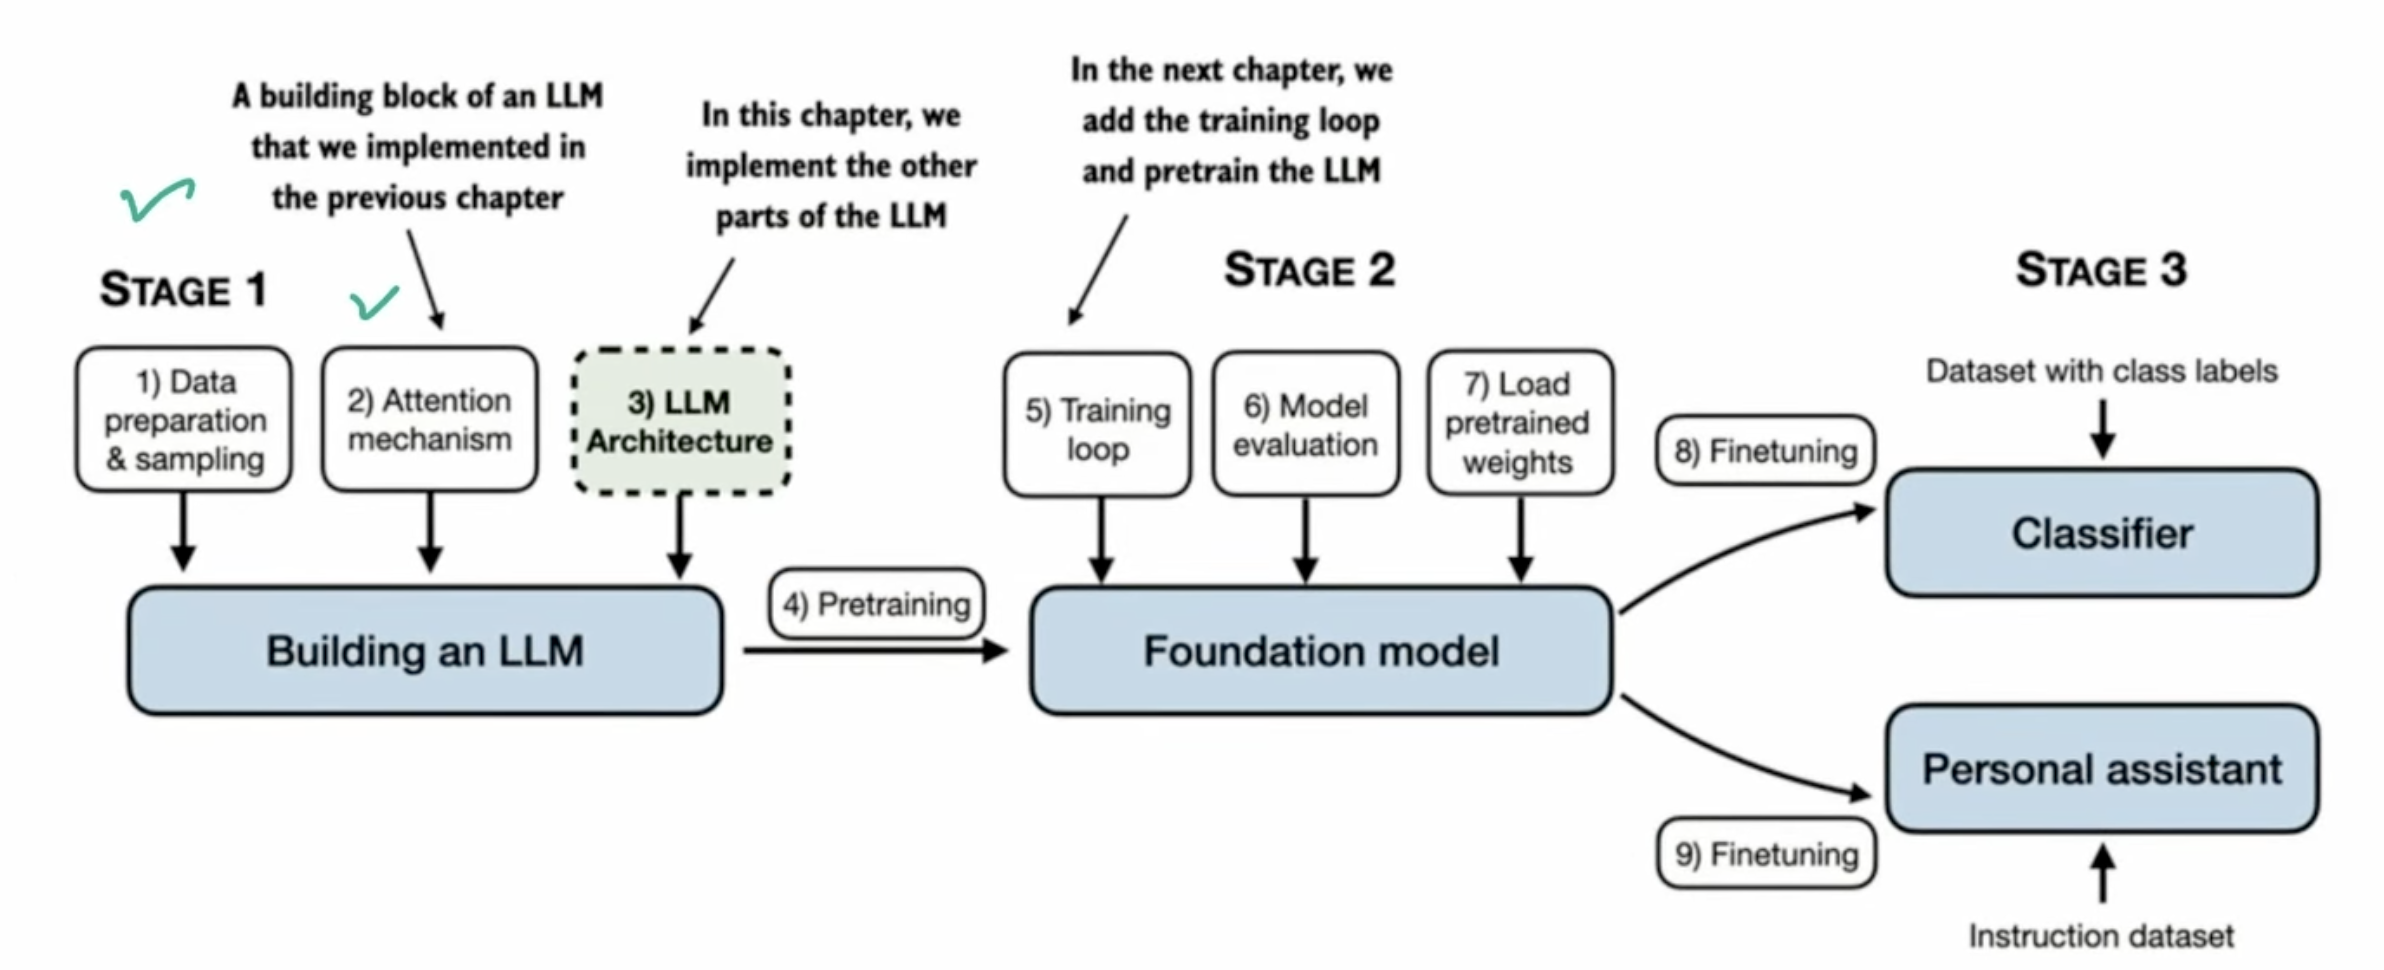



</p>
</div>





<div class="alert alert-block alert-info">
<b>Lets See the flow and building blocks of the LLM</b> 
<p>   

As your see from below the sequence

1. We give input sequence (E.g "Every efforts moves you")
2. Then we <font color=blue> tokenize </font> this input sequence using <font color=blue> Byte-Pair Encoding algorithm </font>
3. This Tokenized input is converted into <font color=blue> Embedded Vector + Positional Embedding Vector </font>
4. This Embedding vectors is then converted using <font color=blue> Context Vectors </font> with the help of <font color=blue> Masked multi-head Attention </font>
5. These Context Vector are <font color=blue> enriched vector </font> that contains semantic and details of how the token is related to other tokens in input sequence walong with the Weightable
6. Next comes the <font color=blue> Transformer Block </font> . This is the most important part of LLm architecture
7. The <font color=blue> output from transformer </font> is then decoded to predict the next word
   

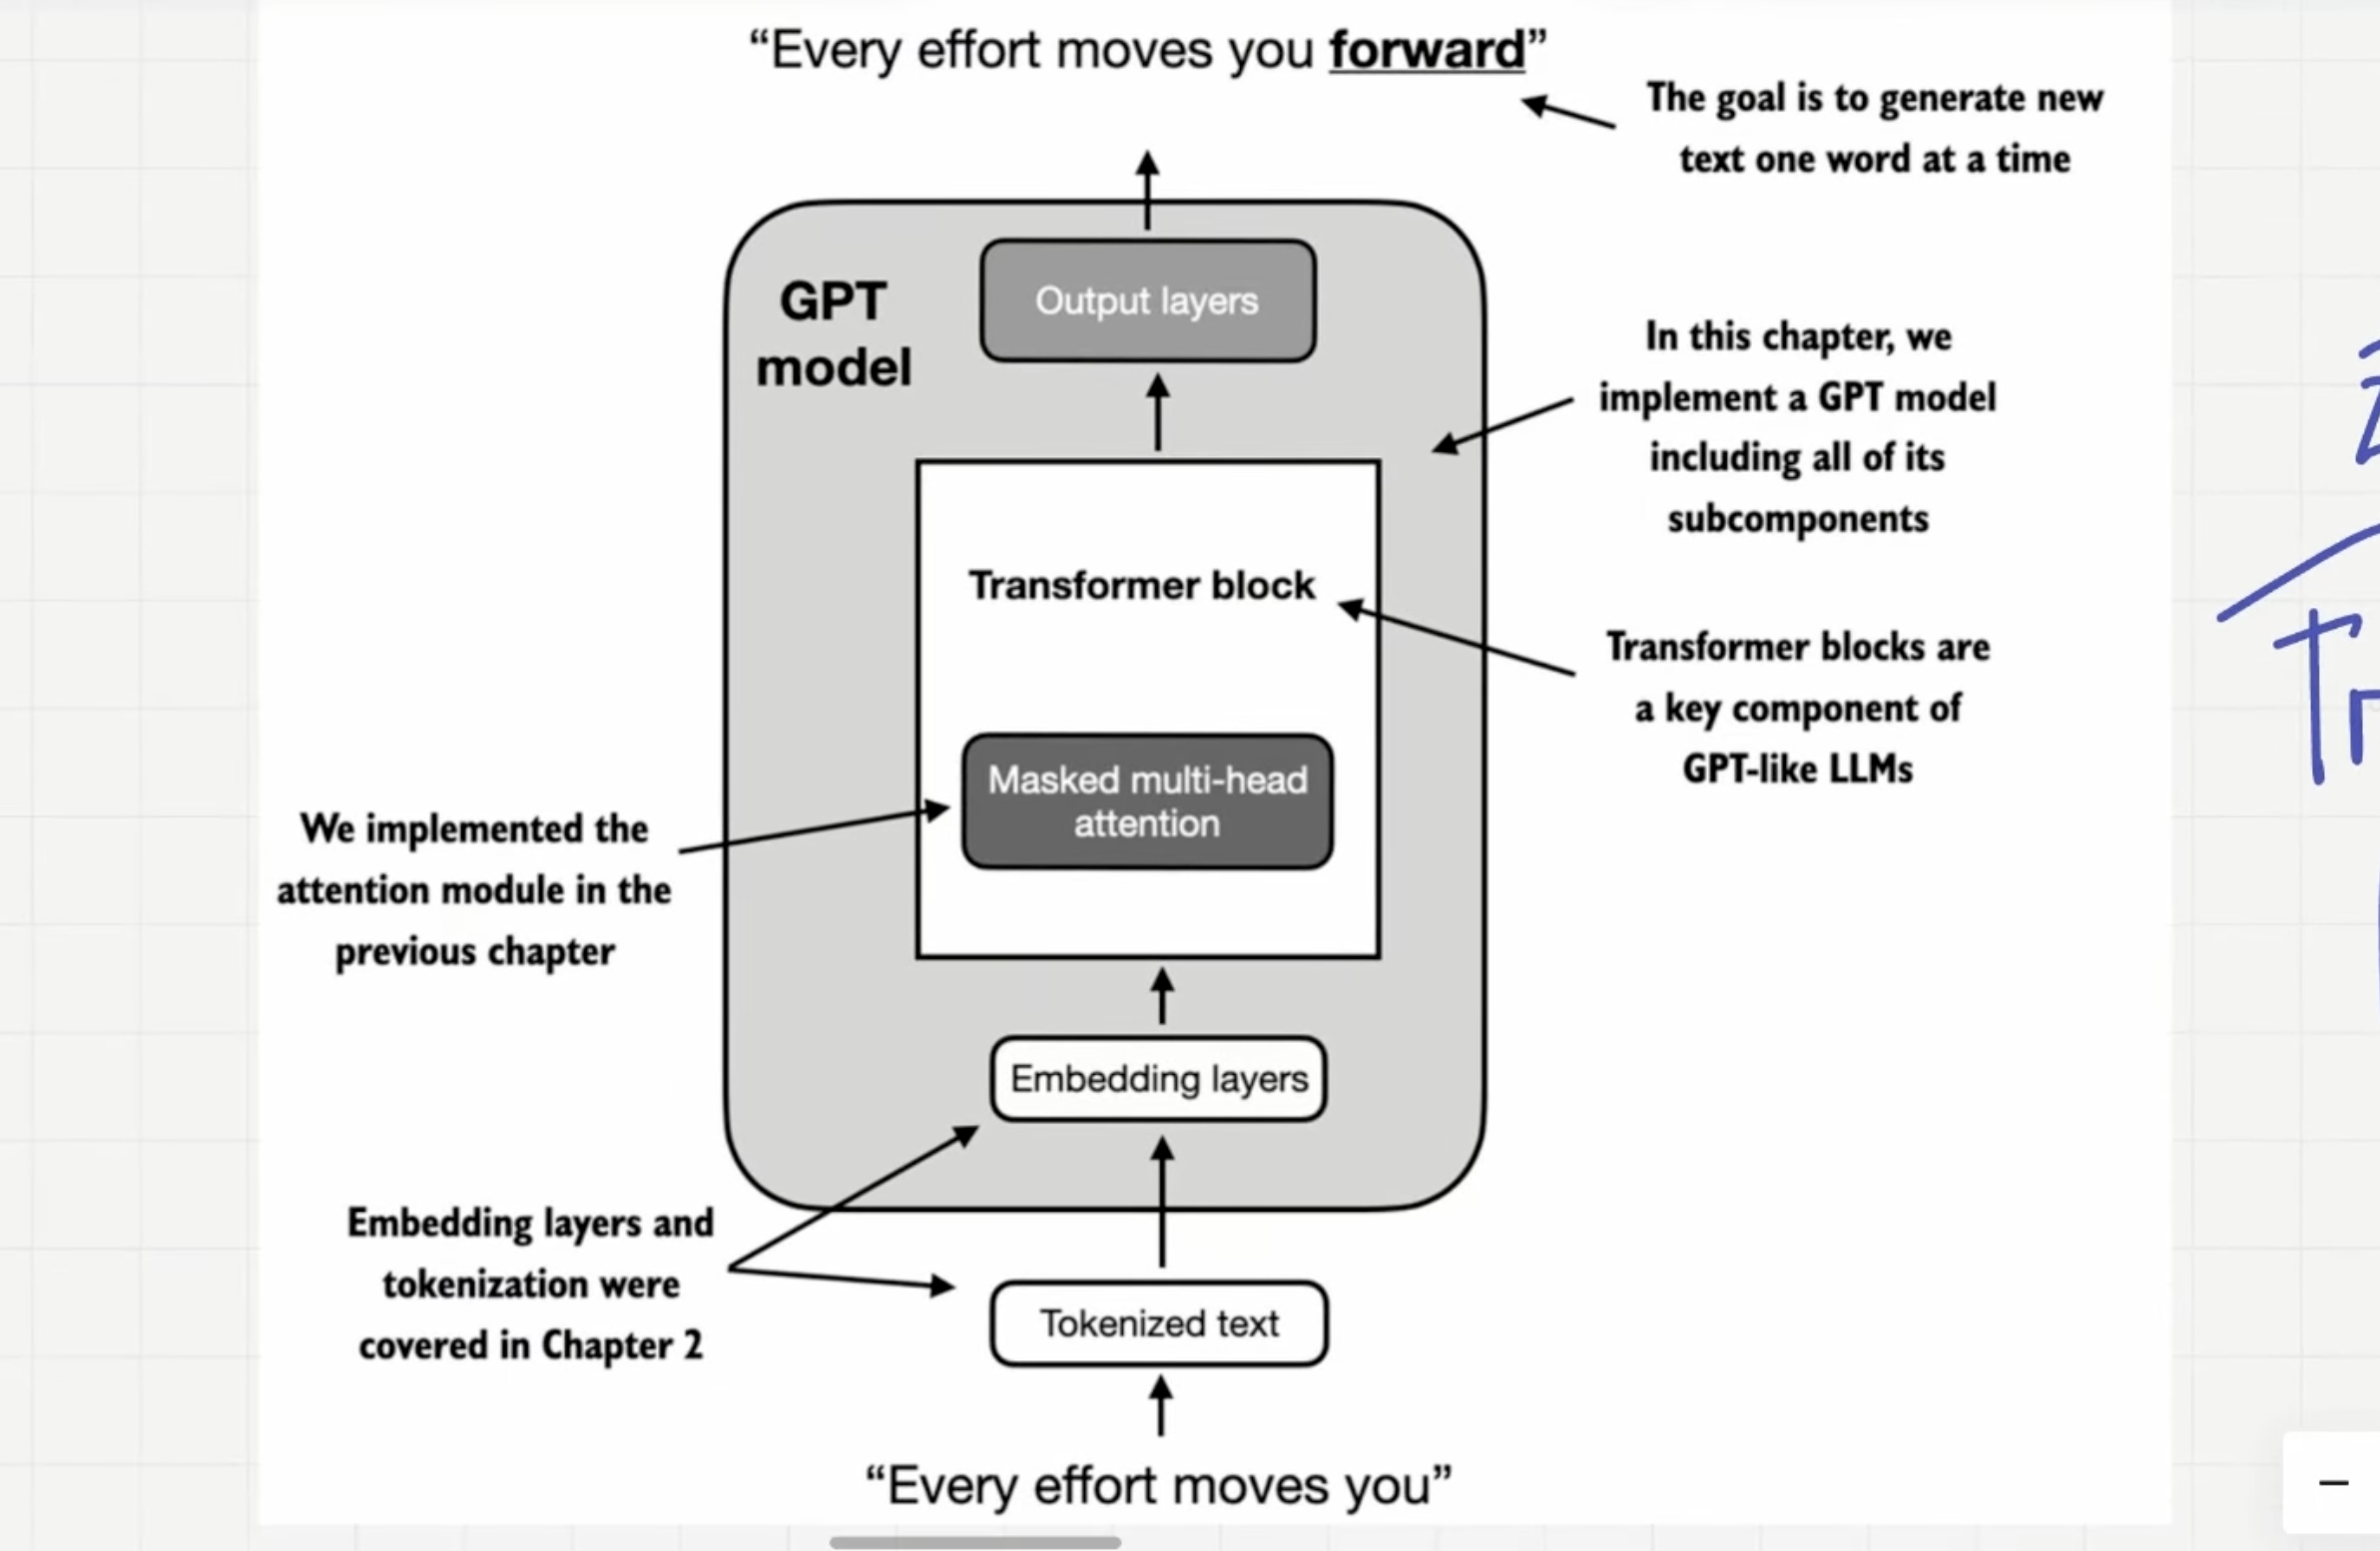



</p>
</div>




In [3]:
# Lets define the confoguration for GPT Model
# We planning to build the GPT Model with 124M parameters. This is the small GPT version

GPT_CONFIG_124M = {
  "vocab_size"     : 50257, # BPE encoding has the vocab size of 50257
  "context_length" : 1024,  # number of token we can look at ones to predict new word
  "emb_dim"        : 768,   # The Toekn Embedding dimension
  "n_heads"        : 12,    # number of attention heads
  "n_layers"       : 12,    # Number of layers (Transformer blocks)
  "drop_rate"      : 0.1,   # Dropout Rate
  "qkv_bias"       : False  # Quert-Key-Value Bias
}

### GPT ARCHITECTURE : Dummy GPT MODEL CLASS

In [4]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"] , cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"] , cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])

        # this is the layer to convert the vector output to Logits vector 
        # of size batch * Context length * vocab_size
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size , seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx) # Embedd the tokesn to higher dimensional space
        pos_embeds = self.pos_emb(torch.arange(seq_len,device=in_idx.device)) # get Pos Embedding
        x=tok_embeds + pos_embeds # Combine the Token Embeds with its position embeds
        x=self.drop_emb(x)   # Perform Droput 
        x=self.trf_blocks(x)
        x= self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [31]:
class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


In [32]:
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

---

# Part 2 : Normalization Layer

# `IMPLEMEMNTING Normalization Layer (LayerNorm1) from the transformer block`

<div class="alert alert-block alert-info">
<b>Norm Layer </b> 
<p>   

As seen in the image below (the detailed transformation block), we will not code and implement the NormLayer1 component in the transformer block
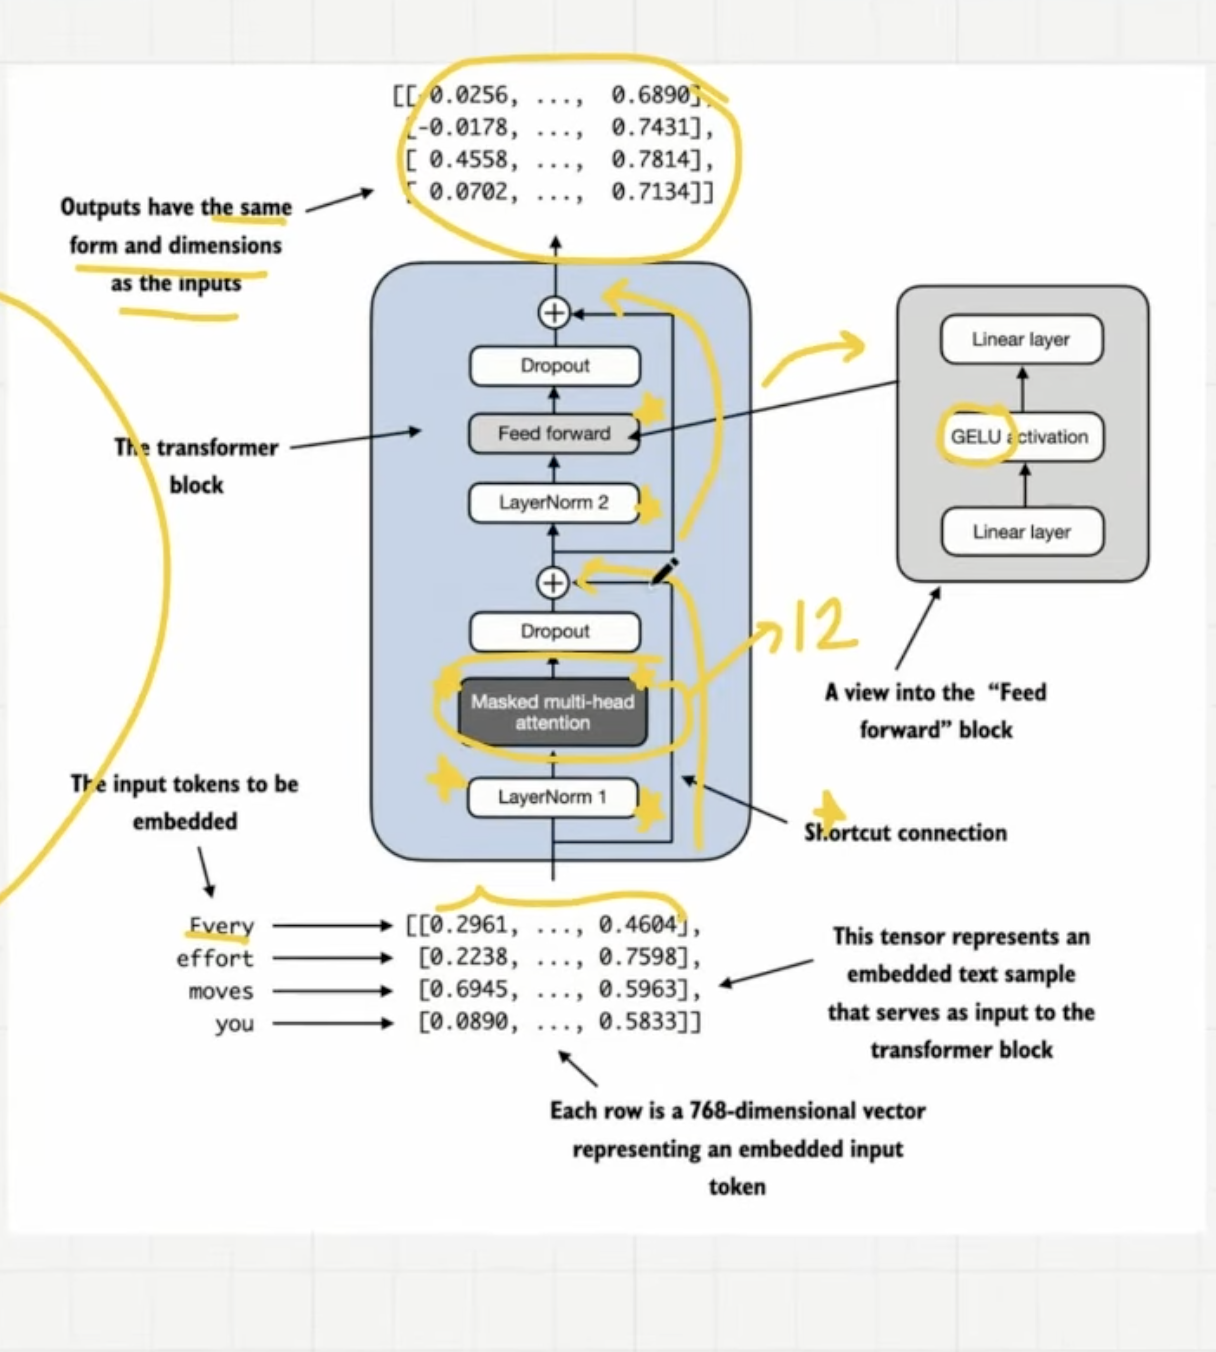

</p>
</div>



---

<div class="alert alert-block alert-info">
<b>Part 1:- Why Normalization</b> 
<p>   

Training deep neural networks with many layers ,lead to the problem of vanishing or explording gradient.
This leads to unstable training dynamics

Layer Normalization improves the stability and efficiency of training neural networks

<b> What exactly we do in normalization </b>

<p> 
    
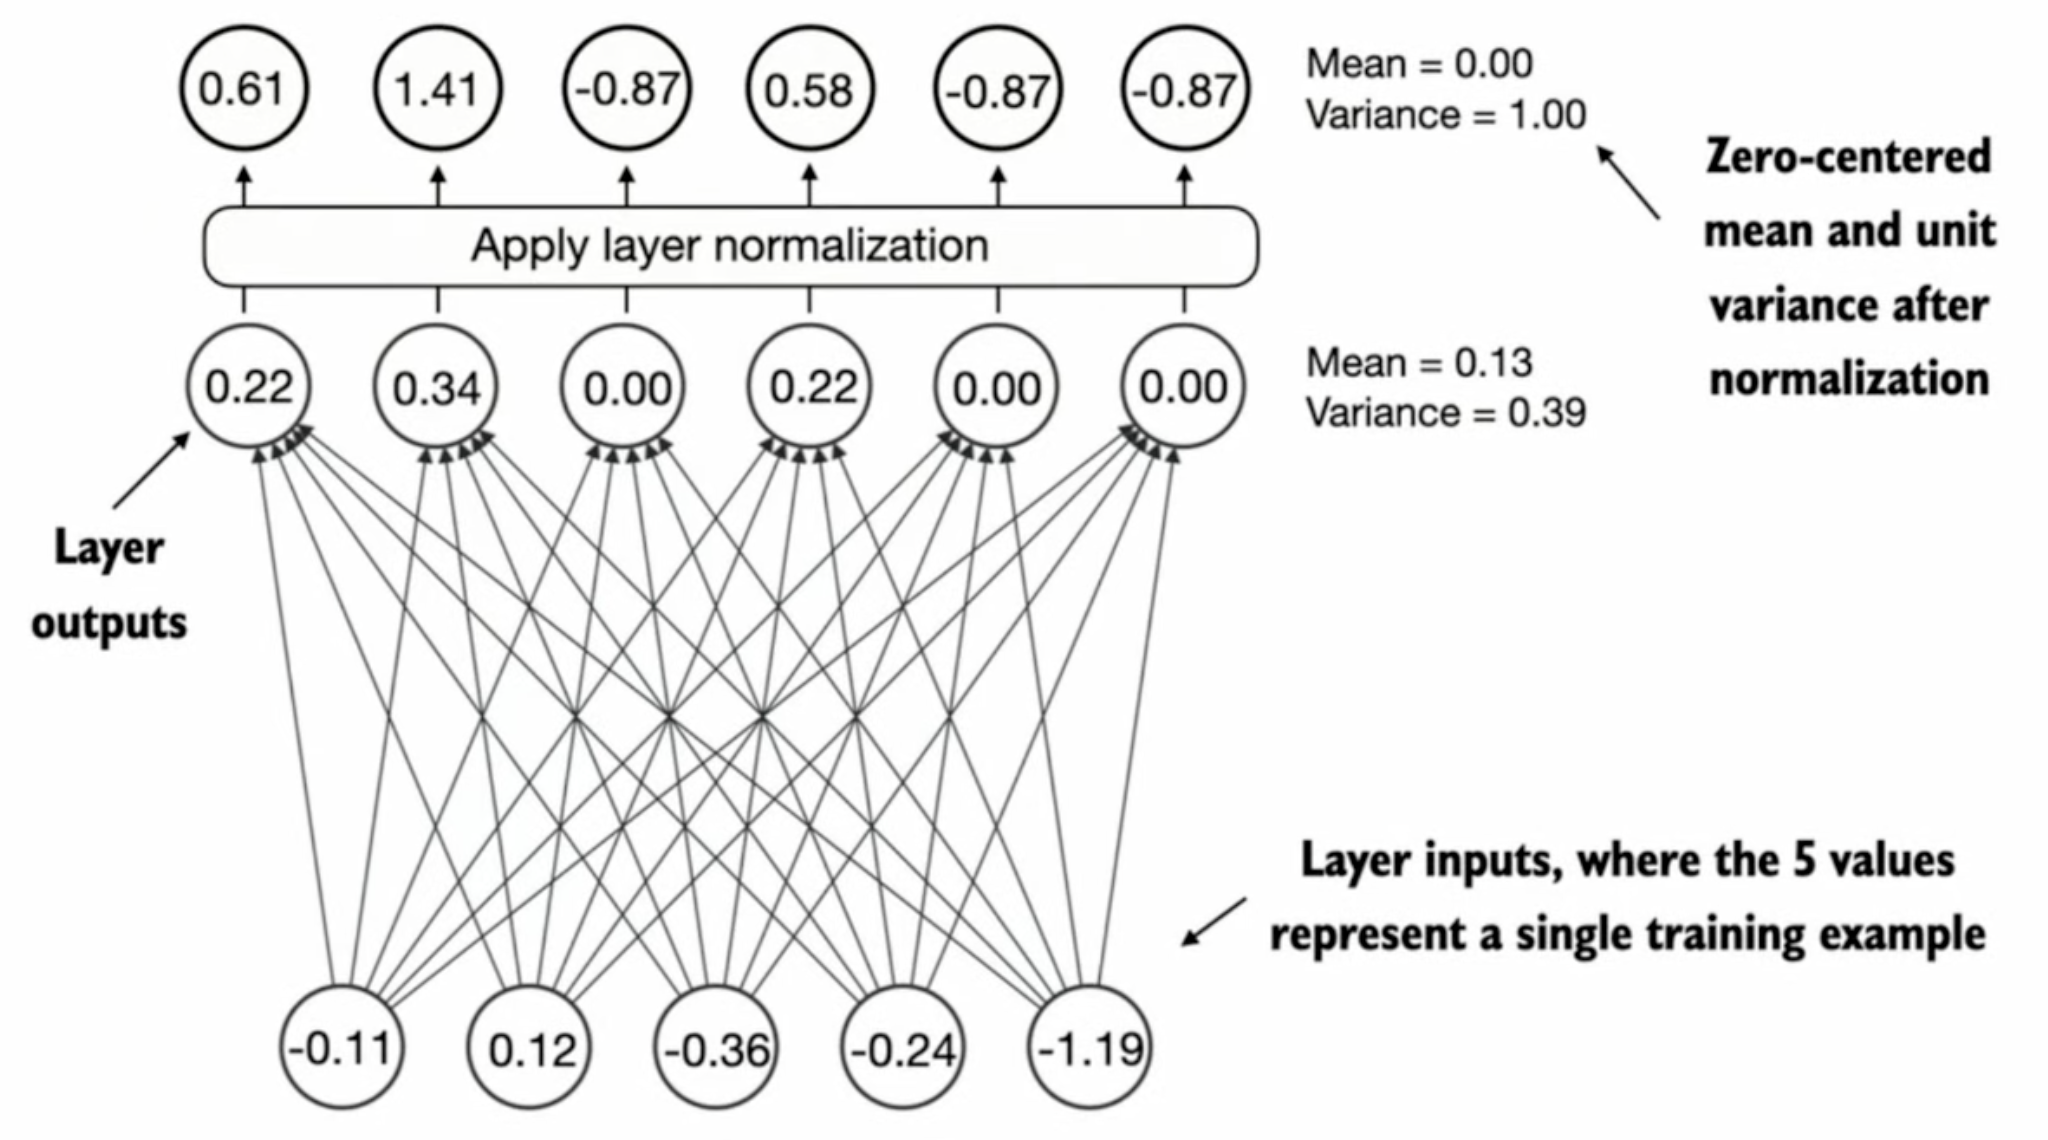

</p>

<b> How you do it </b>

<p>
    
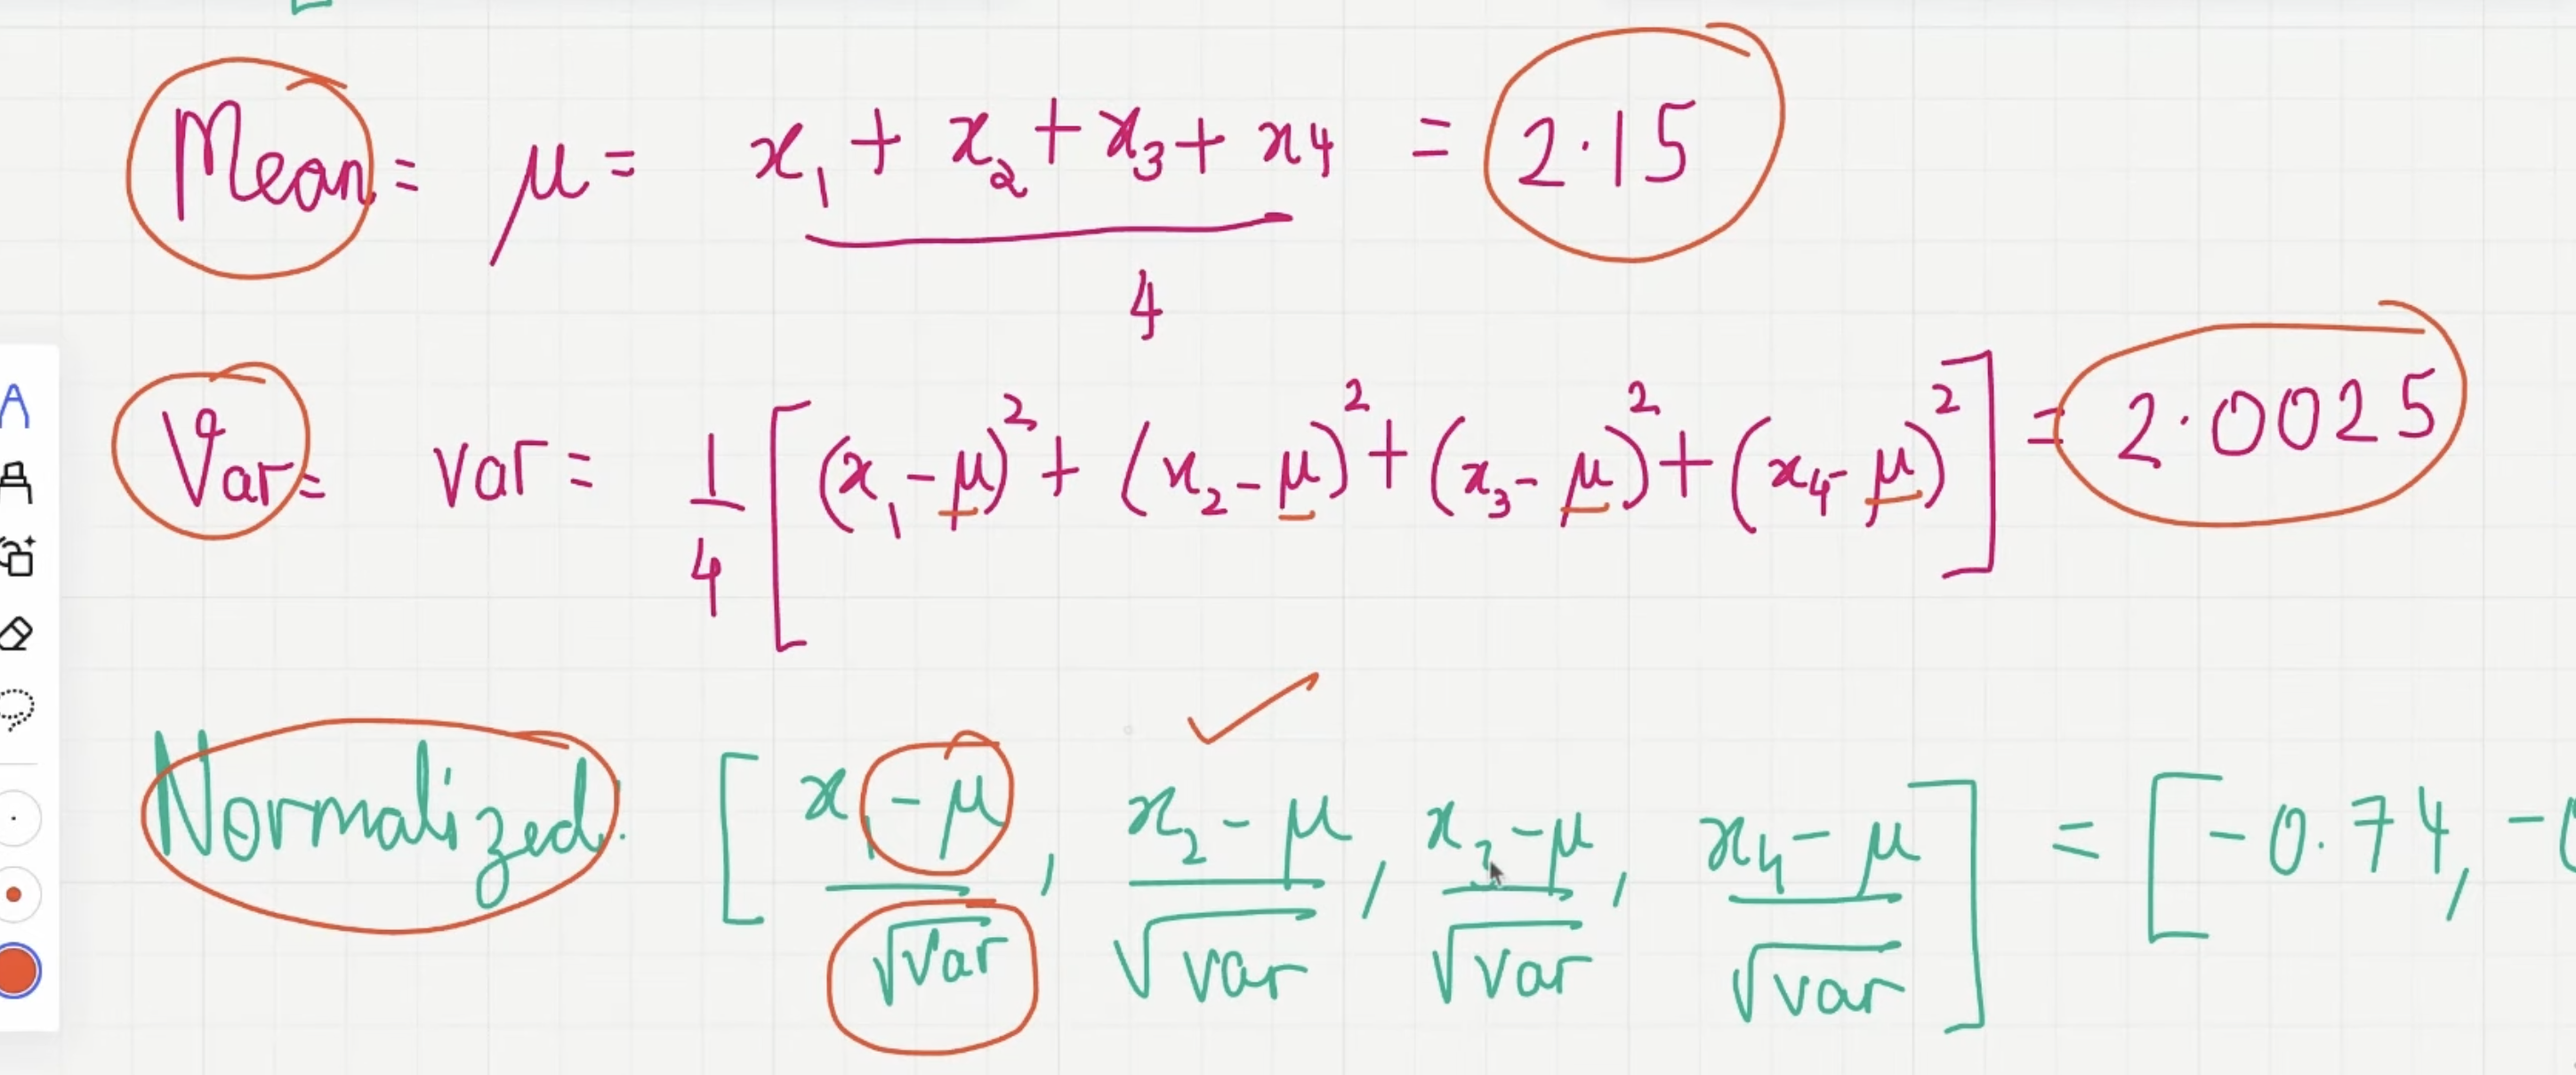
    
</p>

<b> In Nutshell </b>

<p>
    
You ensure that the mean of the values is 0 (zero), and variance of the values is close to one (1)
    
</p>



<b> How many times does Normaliation appear in GPT </b>

<p>
    
In GPT-2 and modern transformer architecture , the layer normalization is typically 
1. applied before and after the multi-head attention module in transformer block
2. before and final output layer as well
    
</p>

</p>
</div>

---

<div class="alert alert-block alert-info">
<b>Lets look at sample example of how normalizaton is working </b> 
<p>   

</p>
</div>



<div class="alert alert-block alert-info">
<b>Example of Normalization in NN</b> 
<p>   

1. We define a NN of 1 layer
2. it takes 5 inputs
3. layer has 6 neurons
4. It outputs 6 values tensor of 2 batches


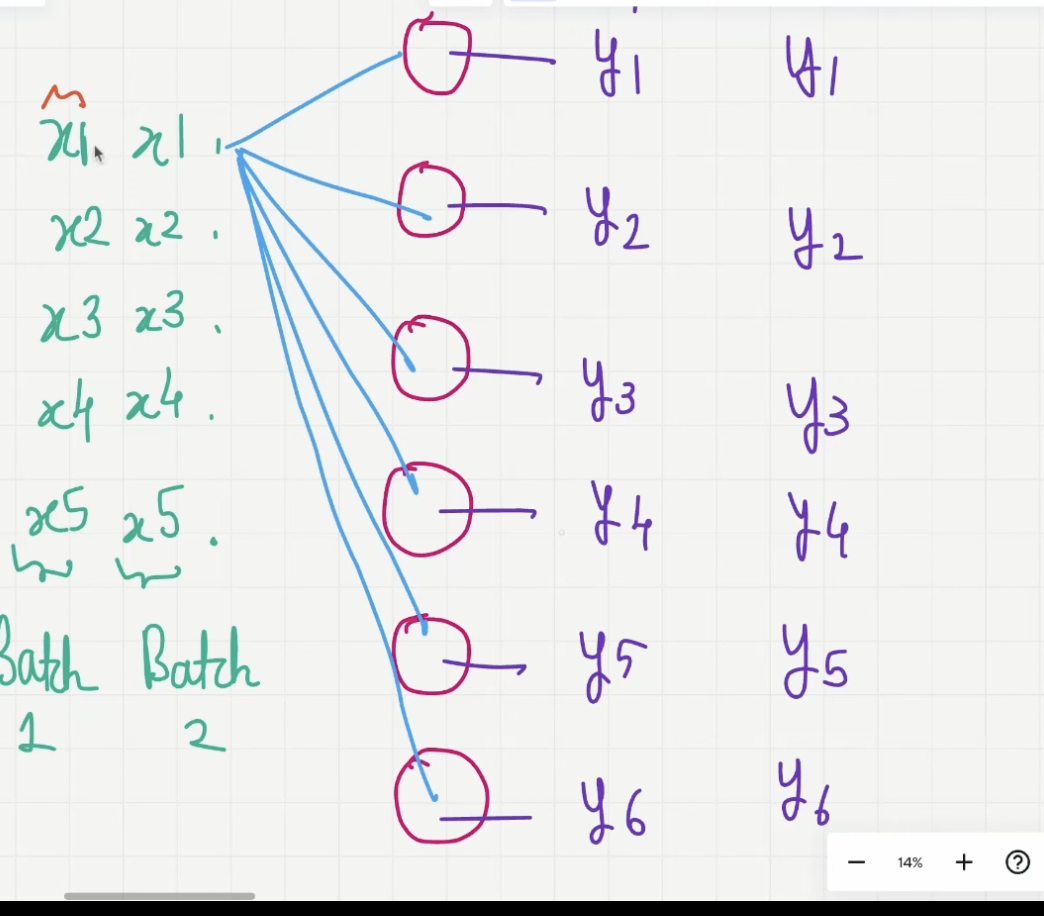



</p>
</div>



In [25]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5) #A
print("Batch: \n" , batch_example)

layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print("Out:\n",out)

Batch: 
 tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]])
Out:
 tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


<div class="alert alert-block alert-info">

The neural network layer we have coded consists of a Linear layer followed by a non-linear
activation function, ReLU (short for Rectified Linear Unit), which is a standard activation
function in neural networks. 

If you are unfamiliar with ReLU, it simply thresholds negative
inputs to 0, ensuring that a layer outputs only positive values, which explains why the
resulting layer output does not contain any negative values. 

(Note that we will use another,
more sophisticated activation function in GPT, which we will introduce in the next section).
</div>

<div class="alert alert-block alert-success">

Before we apply layer normalization to these outputs, let's examine the mean and
variance:

</div>

In [26]:
mean = out.mean(dim=-1 , keepdim=True)
variance = out.var(dim=-1 , keepdim=True)
print("Mean:\n",mean)
print("Variance:\n",variance)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


<div class="alert alert-block alert-success">

Next, let us apply layer normalization to the layer outputs we obtained earlier. The
operation consists of subtracting the mean and dividing by the square root of the variance
(also known as standard deviation):

</div>

In [27]:
out_norm = (out - mean) / torch.sqrt(variance)

mean = out_norm.mean(dim=-1 , keepdim=True)
var = out_norm.var(dim=-1 , keepdim=True)

print("Mean:\n",mean)
print("Variance:\n",variance)

Mean:
 tensor([[-5.9605e-08],
        [ 1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


<div class="alert alert-block alert-success">

To improve readability, we can also turn off the scientific notation when printing tensor
values by setting sci_mode to False:
</div>

In [28]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


---

<div class="alert alert-block alert-success">

Lets Code the Norm Layer
</div>

In [51]:
import torch
import torch.nn as nn
class LayerNorm(nn.Module):
    def __init__(self,emb_dim):
        super().__init__()
        self.eps=1e-5
        self.scale=nn.Parameter(torch.ones(emb_dim))
        self.shift=nn.Parameter(torch.zeros(emb_dim))


    def forward(self,x):
        mean = x.mean(dim=-1,keepdim=True)
        var = x.var(dim=-1 , keepdim=True , unbiased=False)
        norm_x = (x-mean) / torch.sqrt(var+self.eps)
        print(norm_x)
        return self.scale * norm_x + self.shift

<div class="alert alert-block alert-warning">

This specific implementation of layer Normalization operates on the last dimension of the
input tensor x, which represents the embedding dimension (emb_dim). 

The variable eps is a
small constant (epsilon) added to the variance to prevent division by zero during
normalization. 

The scale and shift are two trainable parameters (of the same dimension
as the input) that the LLM automatically adjusts during training if it is determined that
doing so would improve the model's performance on its training task. 

This allows the model
to learn appropriate scaling and shifting that best suit the data it is processing.

</div>

In [52]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print(out_ln)
print("Mean:\n", mean)
print("Variance:\n", var)

tensor([[ 0.5528,  1.0693, -0.0223,  0.2656, -1.8654],
        [ 0.9087, -1.3767, -0.9564,  1.1304,  0.2940]])
tensor([[ 0.5528,  1.0693, -0.0223,  0.2656, -1.8654],
        [ 0.9087, -1.3767, -0.9564,  1.1304,  0.2940]], grad_fn=<AddBackward0>)
Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


---

<div class="alert alert-block alert-info">

As we can see based on the results, the layer normalization code works as expected and
normalizes the values of each of the two inputs such that they have a mean of 0 and a
variance of 1:
</div>